# University Data Analysis

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = "university_enrollment_2306.csv"

university = pd.read_csv(filename)

print(university.head())
print(university.info())
print(university.shape)

   course_id course_type  year  enrollment_count pre_score  post_score  \
0          1   classroom  2018               165     28.14        73.0   
1          2   classroom  2020               175     79.68        86.0   
2          3      online  2016               257     57.24        80.0   
3          4      online  2013               251     97.67        75.0   
4          5   classroom  2019               165     39.75        76.0   

  pre_requirement   department  
0        Beginner      Science  
1            None      Science  
2             NaN  Mathematics  
3        Beginner   Technology  
4        Beginner      Science  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_

## Cleaning Data
Will go through each column cleaning it making sure data types and missing values are corrected. 

#### Column 1 Course ID

In [2]:
courses = len(university["course_id"].unique())
print("Unique values in Course ID {}".format(courses))

Unique values in Course ID 1850


#### Column 2 Course Type

In [3]:
print(university["course_type"].value_counts())
print(university["course_type"].value_counts().sum())
university["course_type"] = university["course_type"].astype("category") # changine to the categorical data type
print("Data type of course type column is {}".format(university["course_type"].dtype))

online       1375
classroom     475
Name: course_type, dtype: int64
1850
Data type of course type column is category


#### Column 3 Year

In [4]:
print(university["year"].isnull().sum()) # check for missing values
print(university["year"].min(), university["year"].max()) # check range of values make sure it matches 
print(university["year"].dtype)

0
2011 2022
int64


#### Column 4 Enrollment Count

In [5]:
print(university["enrollment_count"].describe())
print(university["enrollment_count"].isnull().sum()) # check for missing values 
assert university["enrollment_count"].dtype == "int64" # using assert to check whether its correct data type

count    1850.000000
mean      231.565405
std        36.987029
min       154.000000
25%       185.000000
50%       251.000000
75%       261.000000
max       267.000000
Name: enrollment_count, dtype: float64
0


#### Column 5 Pre Score

In [6]:
print(university["pre_score"].value_counts(ascending = False))
university["pre_score"] = university["pre_score"].replace("-",0) # need to replace - with 0
print(university["pre_score"].value_counts(ascending = False)) 
university["pre_score"] = university["pre_score"].astype(float) # changing data type
print("Pre score column data type {}".format(university["pre_score"].dtype))

-        130
12.11      3
51.95      3
18.01      3
23.66      3
        ... 
13.76      1
33.47      1
18.42      1
8.23       1
17.57      1
Name: pre_score, Length: 1594, dtype: int64
0        130
12.11      3
51.95      3
18.01      3
23.66      3
        ... 
13.76      1
33.47      1
18.42      1
8.23       1
17.57      1
Name: pre_score, Length: 1594, dtype: int64
Pre score column data type float64


#### Column 6 Post Score

In [7]:
print(university["post_score"].isnull().sum()) # check number of missing values
university["post_score"] = university["post_score"].fillna(0) # change missing values to 0
print(university["post_score"].value_counts(ascending = False))
print("Post score column data type {}".format(university["post_score"].dtype)) # check data type is integer

185
0.0      185
72.0      82
76.0      78
79.0      77
73.0      74
80.0      74
71.0      72
77.0      72
81.0      72
75.0      68
74.0      67
78.0      67
68.0      66
69.0      64
66.0      59
70.0      55
67.0      54
82.0      54
86.0      42
84.0      42
83.0      38
65.0      36
87.0      33
85.0      32
61.0      31
63.0      30
62.0      26
89.0      25
64.0      24
88.0      18
90.0      17
60.0      16
92.0      13
59.0      12
57.0      10
98.0      10
94.0       9
55.0       7
95.0       6
96.0       5
93.0       5
97.0       4
91.0       4
58.0       3
56.0       2
54.0       2
51.0       1
105.0      1
99.0       1
100.0      1
53.0       1
102.0      1
101.0      1
103.0      1
Name: post_score, dtype: int64
Post score column data type float64


#### Column 7 Pre Requirement

In [8]:
print(university["pre_requirement"].value_counts())
print(university["pre_requirement"].value_counts().sum())
print(university["pre_requirement"].isnull().sum()) # check number of missing values
print(university["pre_requirement"].dtype)
print("After changes")
university["pre_requirement"] = university["pre_requirement"].fillna("None") # change missing values to None
university["pre_requirement"] = university["pre_requirement"].astype("category") # change data type to category
print(university["pre_requirement"].value_counts())
print(university["pre_requirement"].dtype)

None            802
Beginner        654
Intermediate    305
Name: pre_requirement, dtype: int64
1761
89
object
After changes
None            891
Beginner        654
Intermediate    305
Name: pre_requirement, dtype: int64
category


#### Column 8 Department

In [9]:
print(university["department"].value_counts())
print(university["department"].value_counts().sum())
print(university["department"].isnull().sum())
print("Department column data type {}".format(university["department"].dtype))
print("After Changes")
update_cats = {"Math":"Mathematics"}
university["department"] = university["department"].replace(update_cats) # want to change math category to mathematics
print(university["department"].value_counts())
print(university["department"].value_counts().sum())
university["department"] = university["department"].astype("category")
print("Department column data type {}".format(university["department"].dtype))

Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: department, dtype: int64
1850
0
Department column data type object
After Changes
Technology     719
Science        472
Mathematics    440
Engineering    219
Name: department, dtype: int64
1850
Department column data type category


### Cleaning Data Summary 
- Course ID - same as description 1850 unique values
- Course Type - Same as description, two possible values with no missing values. Changed to a categorical data type
- Year - Same as description minimum value is 2011 and maximum value is 2022. There are no missing values. Kept as integer data type as it should be only discrete values. 
- Enrollment Count -  Matches description, integer data type with no missing values
- Pre Score -  Initial inspection suggests there no missing values, however using value counts method shows there are 130 entries entered as "-". These are replaced with 0 and data type changed to float
- Post Score - 185 entries missing entires filled with 0 value. Data type is already a float
- Pre Requirement - 89 missing entries replaced with "None" and changed data type to category.
- Department - No missing values, but there is a Math and Mathematics category. Will combine Math into Mathematics. Converted data type into categorical. 

## Data Visualisation
### Visualising Enrollment Count
There appears to be two groups of distribution of the enrollment count, courses having between 150 and 190 people and courses having between 230 and 270 people. There are no courses having people between 190 and 230 people. Majority of courses appear to be in the upper range with most courses having around 250 people.

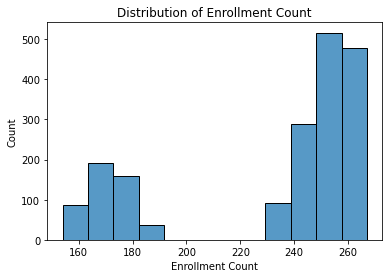

In [10]:
ax = sns.histplot(data = university, x="enrollment_count")
ax.set(xlabel = "Enrollment Count", title = "Distribution of Enrollment Count")

plt.show()

### Visualising Different Types of Courses 
From the graph below online courses clearly have the most observations. The observations are not balanced with online having almost triple the amount compared to the classroom. 


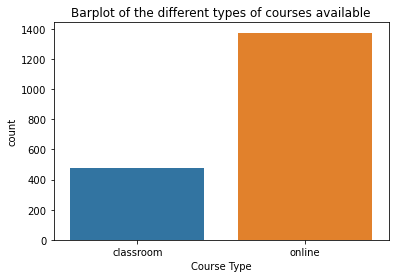

In [11]:
ax = sns.countplot(data=university, x="course_type")
ax.set(xlabel = "Course Type", title = "Barplot of the different types of courses available")

plt.show()

### Visualisng How Course Type Effects Enrollment Distribution
The Figure below shows how important a role the course type impacts the enrollment figures. Online courses have significantly higher enrollment than classroom with the minimum enrollment of an online course greater than the maximum enrollment of as classroom course. The distribution for classroom courses has a slight positive skew and slight negative skew for online courses. 

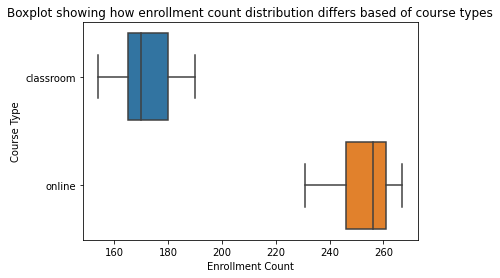

In [12]:
ax = sns.boxplot(data=university, x="enrollment_count", y="course_type")
ax.set(xlabel = "Enrollment Count", ylabel = "Course Type", title = "Boxplot showing how enrollment count distribution differs based of course types")
# plt.savefig("University_boxplot_distribution.jpg", bbox_inches='tight')
plt.show()

## Machine Learning Problem

Would like to predict the enrollment count using the features. As enrollment count is a continuous variable this is a regression problem. Will use two regression models evaluate each one and decide which one is better. The 2 models I will be fitting are a Linear Regression Model and a Random Forest Regressor Model. I chose Linear Regression as its a simple model to fit and its results are easy to interpret. I chose a Random Forest Regressor model as a comparison as it is able to capture more complex relationships and is less prone to overfitting on the training set. 

### Feature Engineering
Before a machine learning model is fit the dataset requires a few changes
- Dropping the course ID column as they are all unique values it doesn't provide any valuable information
- Dummy variables need to be created for the the categorical variables 
- This includes the year column, will have to be done sepeartely because it is an integer data type
- Join these two datasets together

In [13]:
#dummy variables for year
year = university["year"]
year_dummies = pd.get_dummies(year)
print("Shape of year dummies {}".format(year_dummies.shape))
# dummy variables for other categorical columns
university_dropped = university.drop(["course_id","year"], axis = 1)
university_dummies = pd.get_dummies(university_dropped)
print("Shape of university dummies {}".format(university_dummies.shape))
# combine the two dataframes
university_model = university_dummies.join(year_dummies)
print("Shape of university model {}".format(university_model.shape))
university_model.head()

Shape of year dummies (1850, 12)
Shape of university dummies (1850, 12)
Shape of university model (1850, 24)


,enrollment_count,pre_score,post_score,course_type_classroom,course_type_online,pre_requirement_Beginner,pre_requirement_Intermediate,pre_requirement_None,department_Engineering,department_Mathematics,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,165,28.14,73.0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,175,79.68,86.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,257,57.24,80.0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,251,97.67,75.0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,165,39.75,76.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Implementing Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = university_model.drop(["enrollment_count"], axis = 1), university_model["enrollment_count"]
print("Shape of X is {}, shape of y is {}".format(X.shape, y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred_lr = linreg.predict(X_test)

Shape of X is (1850, 23), shape of y is (1850,)


#### Implementing Random Forest Regressor Model

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Evaluating Models
Will compare the results using the Root Mean Squared Error (RMSE) metrics. This shows the average deviation in predicted results to the actual results and has the same units as the target variable. 

In [16]:
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE of the Linear Regression model is {}".format(round(rmse_lr,3)))
print("RMSE of the Random Forest Regression model is {}".format(round(rmse_rf, 3)))

RMSE of the Linear Regression model is 0.324
RMSE of the Random Forest Regression model is 0.358


## Conclusion
The Linear Regression model has a marginally smaller RMSE than the Random Forest Regression model, 0.324 and 0.358 respectively. While both models are very accurate, as seen by the small RMSE (both models able to predict within 1 person of the actual value), it suggests that the Linear Regression model is better at predicting the enrollment for different courses. However, the hyperparameters of the Random Forest model haven't been tuned. With further tuning using GridSearchCV or RandomizedSearchCV to find the optimal hyperparamters a lower RMSE value could be obtained.